<a href="https://colab.research.google.com/github/greenty5/ict2022_fluidDynamics/blob/main/Session48_2DLinearConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fluid Dynamics with Python (ICT Summer School 2022)
=====
***

Up to now, all of our work has been in one spatial dimension. We can learn a lot in just 1D, but let's grow up to flatland: two dimensions. 

In the following exercises, you will extend the first some steps to 2D. To extend the 1D finite-difference formulas to partial derivatives in 2D or 3D, just apply the definition: a partial derivative with respect to $x$ is the variation in the $x$ direction *at constant* $y$.

In 2D space, a rectangular (uniform) grid is defined by the points with coordinates:

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Now, define $u_{i,j} = u(x_i,y_j)$ and apply the finite-difference formulas on either variable $x,y$ *acting separately* on the $i$ and $j$ indices. All derivatives are based on the 2D Taylor expansion of a mesh point value around $u_{i,j}$.

Hence, for a first-order partial derivative in the $x$-direction, a finite-difference formula with forward differential is:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \cdots $$

and similarly in the $y$ direction. Thus, we can write backward-difference, forward-difference or central-difference formulas for Steps 5 to 12. Let's get started!

Session 4.8 2-D Linear Convection
----
***

The PDE governing 2-D Linear Convection is written as

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

This is the exact same form as with 1-D Linear Convection, except that we now have two spatial dimensions to account for as we step forward in time.  

Again, the timestep will be discretized as a forward difference and both spatial steps will be discretized as backward differences.  

With 1-D implementations, we used $i$ subscripts to denote movement in space (e.g. $u_{i}^n-u_{i-1}^n$).  Now that we have two dimensions to account for, we need to add a second subscript, $j$, to account for all the information in the regime.  

Here, we'll again use $i$ as the index for our $x$ values, and we'll add the $j$ subscript to track our $y$ values.  

With that in mind, our discretization of the PDE should be relatively straightforward.  

<font color='orange'> (please derive discretized eqation) $$\cdots$$  </font>

As before, solve for the only unknown:

<font color='orange'> 
$$u_{i,j}^{n+1} = \cdots$$
</font>

We will solve this equation with the following initial conditions:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

and boundary conditions:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

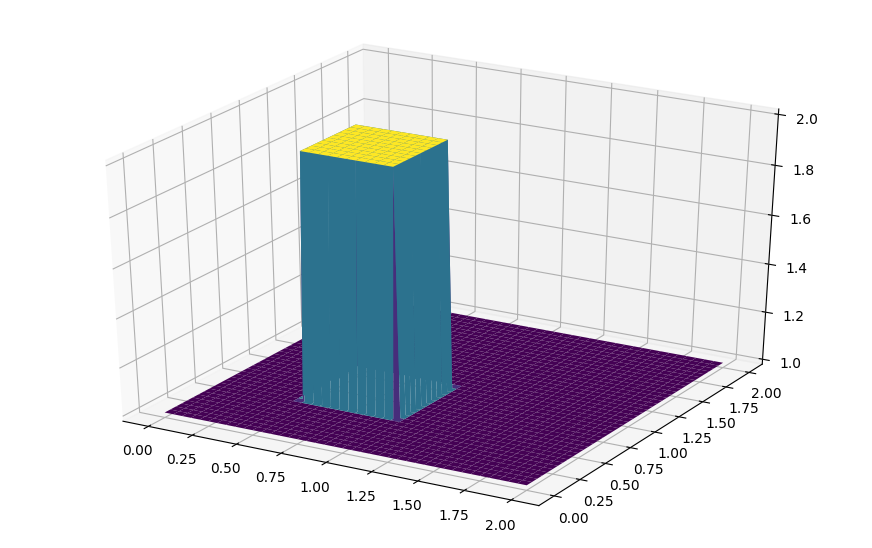

In [ ]:
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline

###variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx)) ##create a 1xn vector of 1's
un = np.ones((ny, nx)) ##

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)



---

<font color='orange'> over to you! </font>

```python
u = np.ones((ny,nx))
```

Please consider why we declare a variable _u_ as `(ny,nx)` not `(nx,ny)`.


---

### 3D Plotting Notes

To plot a projected 3D result, make sure that you have added the Axes3D library.  

    from mpl_toolkits.mplot3d import Axes3D

The actual plotting commands are a little more involved than with simple 2d plots.

```python
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:])
```

The first line here is initializing a figure window.  The **figsize** and **dpi** commands are optional and simply specify the size and resolution of the figure being produced.  You may omit them, but you will still require the 
    
    fig = pyplot.figure()

The next line assigns the plot window the axes label 'ax' and also specifies that it will be a 3d projection plot.  The final line uses the command
    
    plot_surface()

which is equivalent to the regular plot command, but it takes a grid of X and Y values for the data point positions.  


##### Note


The `X` and `Y` values that you pass to `plot_surface` are not the 1-D vectors `x` and `y`.  In order to use matplotlibs 3D plotting functions, you need to generate a grid of `x, y` values which correspond to each coordinate in the plotting frame.  This coordinate grid is generated using the numpy function `meshgrid`.

    X, Y = numpy.meshgrid(x, y)

 

### Iterating in two dimensions

To evaluate the wave in two dimensions requires the use of several nested for-loops to cover all of the `i`'s and `j`'s.  Since Python is not a compiled language there can be noticeable slowdowns in the execution of code with multiple for-loops.  First try evaluating the 2D convection code and see what results it produces. 

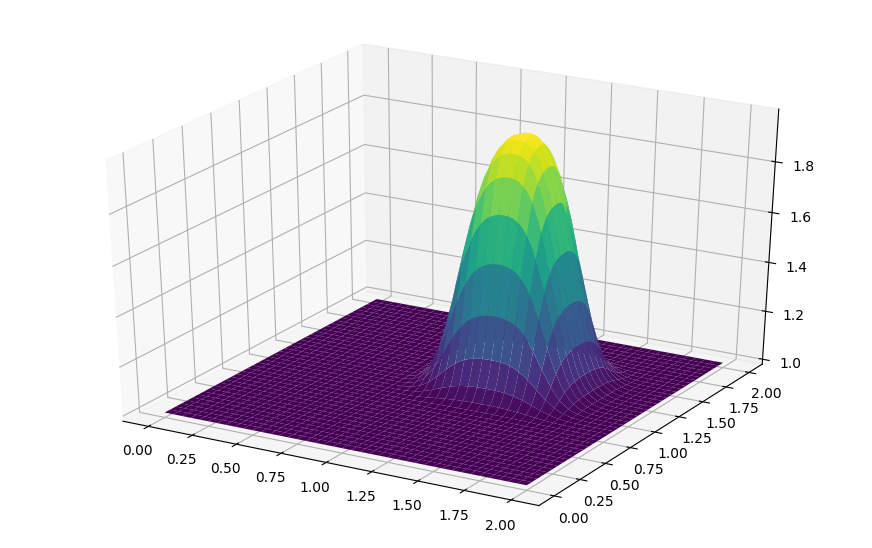

In [ ]:
u = np.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            # write your own code here

            

            # boundary condition
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

Array Operations
----------------

<font color='orange'> over to you! </font>


Here the same 2D convection code is implemented, but instead of using nested for-loops, the same calculations are evaluated using array operations.  

In [ ]:






fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

NameError: ignored

## Learn More

You can study about this session in detail by using YouTube Video mentioned below.

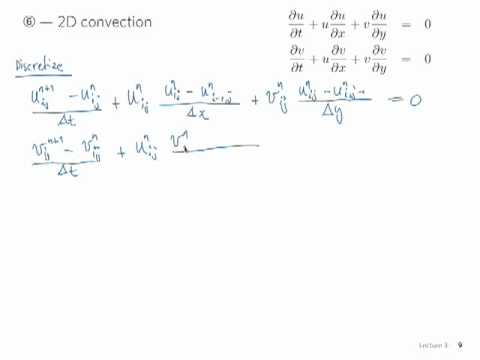

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')